In [1]:
import pandas as pd

In [2]:
from dask import dataframe as dd

In [3]:
df=pd.read_csv("Train/Train.csv")

In [4]:
df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [5]:
df.columns

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')

In [6]:
df.Title[0]

'How to check if an uploaded file is an image without mime type?'

In [7]:
df.Body[0]

"<p>I'd like to check if an uploaded file is an image file (e.g png, jpg, jpeg, gif, bmp) or another file. The problem is that I'm using Uploadify to upload the files, which changes the mime type and gives a 'text/octal' or something as the mime type, no matter which file type you upload.</p>\n\n<p>Is there a way to check if the uploaded file is an image apart from checking the file extension using PHP?</p>\n"

In [8]:
df.Tags[0]

'php image-processing file-upload upload mime-types'

In [9]:
df.shape

(6034195, 4)

In [5]:
df1=df.copy()

In [6]:
df2=df1.groupby(["Title","Body","Tags"])

In [40]:
import sqlite3 as db

In [7]:
# frm stackoverflow
df3=pd.DataFrame(df2.size().reset_index(name="count"))

In [44]:
df3.shape,df.shape

((4206307, 4), (6034195, 4))

In [45]:
print("NO of duplicates:::",df.shape[0]-df3.shape[0])

NO of duplicates::: 1827888


In [8]:
df3["Tag_Count"]=df3["Tags"].apply(lambda text: len(text.split(" ")))

In [9]:
df3.Tag_Count.value_counts()

3    1206157
2    1111706
4     814996
1     568290
5     505158
Name: Tag_Count, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())

In [11]:
total_tags=vectorizer.fit_transform(df3.Tags)

In [12]:
total_tags.shape

(4206307, 42048)

In [13]:
print("unique tags count:::",total_tags.shape[1])

unique tags count::: 42048


In [14]:
tags = vectorizer.get_feature_names()

In [58]:
print(tags[:100])

['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.exe.config', '.hgtags', '.htaccess', '.htpasswd', '.ico', '.lib', '.lrc', '.mobi', '.mov', '.net', '.net-1.0', '.net-1.1', '.net-2.0', '.net-3.0', '.net-3.5', '.net-4.0', '.net-4.0-beta-2', '.net-4.0-rc1', '.net-4.5', '.net-assembly', '.net-authorization', '.net-bcl', '.net-bugs', '.net-cf-3.5', '.net-client-profile', '.net-compact', '.net-framework', '.net-framework-source', '.net-framework-version', '.net-gadgeteer', '.net-install', '.net-internals', '.net-interview', '.net-micro-framework', '.net-reflector', '.net-remoting', '.net-security', '.net-services', '.net2.0', '.net3.5', '.net4.0', '.netrc', '.nettiers', '.obj', '.post', '.procmailrc', '.profile', '.railsrc', '.rdlc', '.refresh', '.sbr', '.screenrc', '.sdf', '.sys', '.vdproj', '.war', '.wav', '.when', '.x', '10.8', '1080p', '10gbethernet', '10gen-csharp-driver', '10gige', '110', '11

In [15]:
frequency_of_each_tag=total_tags.sum(axis=0).A1

In [69]:
frequency_of_each_tag

array([18, 37,  1, ...,  8, 32,  1], dtype=int64)

In [16]:
freq_tag_dict=dict(zip(tags,frequency_of_each_tag))

In [73]:
file=open("freq_tags_counts.csv","w")

In [75]:
import csv
writer = csv.writer(file)

In [76]:
for key, value in freq_tag_dict.items():
    writer.writerow([key, value])

In [17]:
tag_df=pd.read_csv("freq_tags_counts.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [18]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

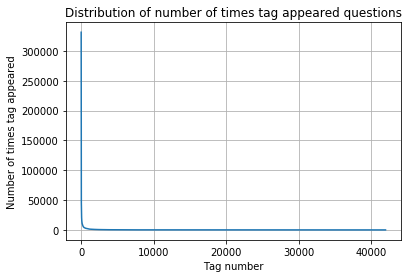

In [87]:
import matplotlib.pyplot as plt
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [88]:
tag_counts.shape

(41939,)

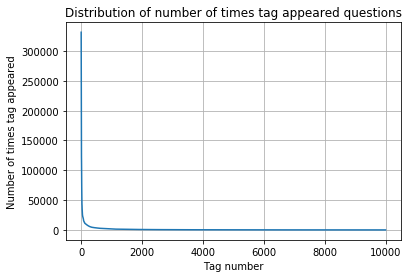

In [89]:
plt.plot(tag_counts[:10000])
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

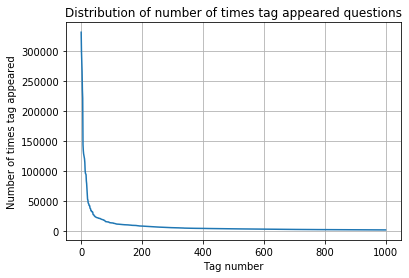

In [90]:
plt.plot(tag_counts[:1000])
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

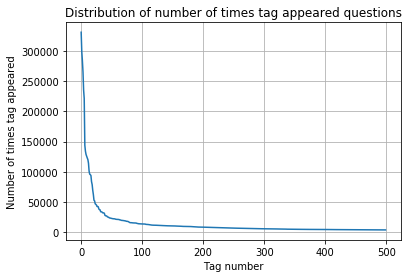

In [91]:
plt.plot(tag_counts[:500])
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

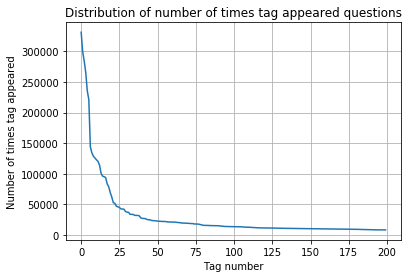

In [92]:
plt.plot(tag_counts[:200])
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

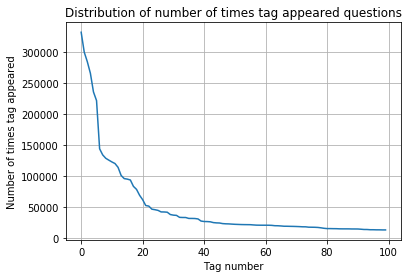

In [93]:
plt.plot(tag_counts[:100])
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [101]:
print("tags appered more than 10000 times::",tag_df[tag_df.Counts>10000].shape[0])
print("tags appered more than 1000 times::",tag_df[tag_df.Counts>1000].shape[0])
print("tags appered more than 500 times::",tag_df[tag_df.Counts>500].shape[0])
print("tags appered more than 400 times::",tag_df[tag_df.Counts>400].shape[0])
print("tags appered more than 300 times::",tag_df[tag_df.Counts>300].shape[0])
print("tags appered more than 200 times::",tag_df[tag_df.Counts>200].shape[0])
print("tags appered more than 100 times::",tag_df[tag_df.Counts>100].shape[0])
print("tags appered more than 10 times::",tag_df[tag_df.Counts>10].shape[0])

tags appered more than 10000 times:: 153
tags appered more than 1000 times:: 1554
tags appered more than 500 times:: 2744
tags appered more than 400 times:: 3228
tags appered more than 300 times:: 3974
tags appered more than 200 times:: 5256
tags appered more than 100 times:: 8222
tags appered more than 10 times:: 25257


In [103]:
tags_per_ques=total_tags.sum(axis=1).A1

In [110]:
print("minimum no of tags in a question:::",min(tags_per_ques))
print("maximum no of tags in a question:::",max(tags_per_ques))

minimum no of tags in a question::: 1
maximum no of tags in a question::: 5


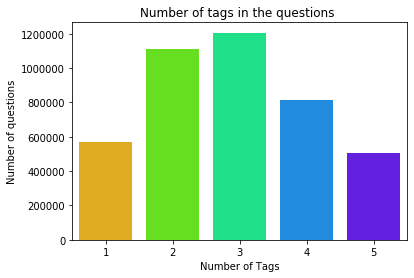

In [112]:
import seaborn as sns
sns.countplot(tags_per_ques, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

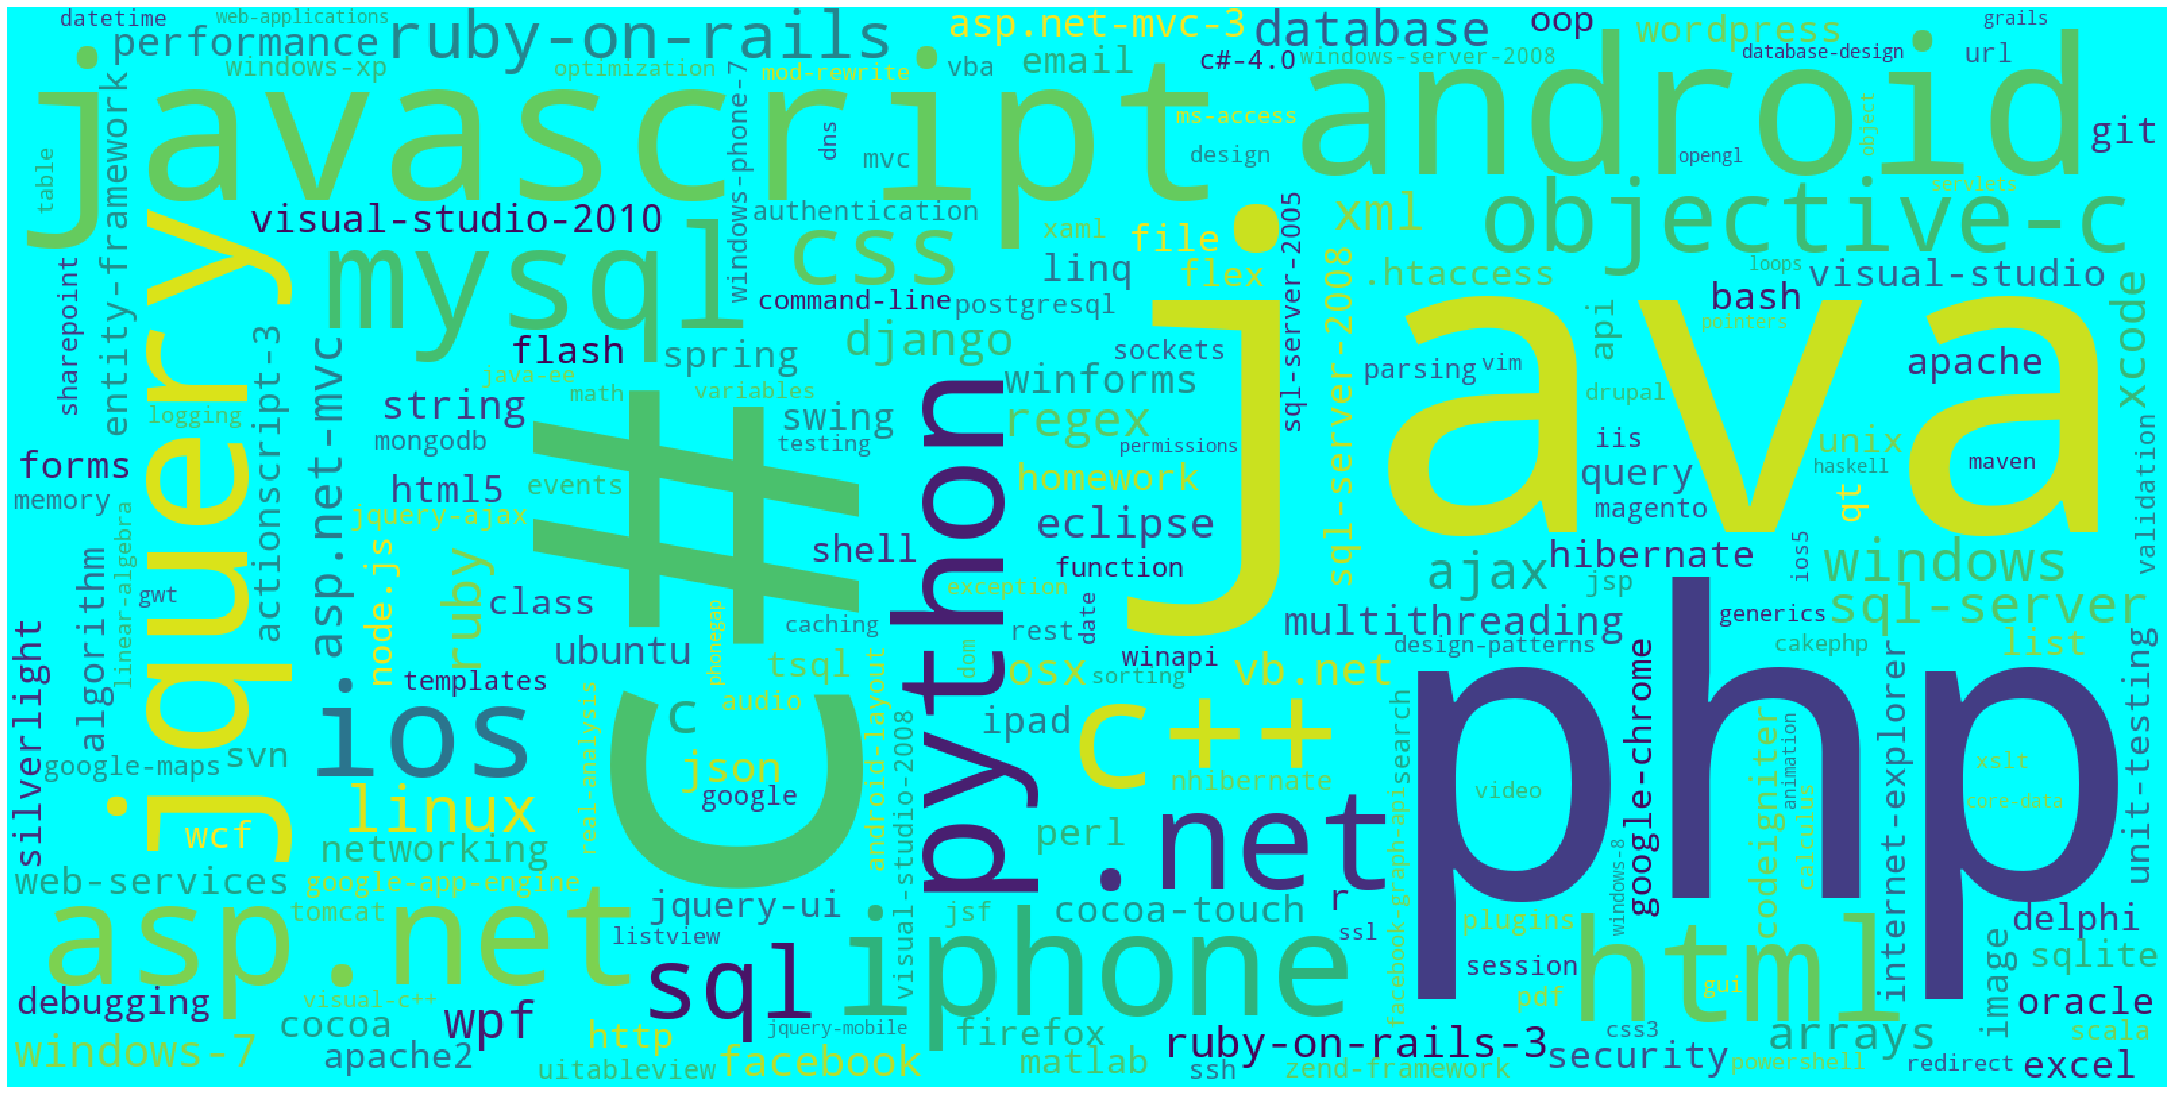

In [114]:
from wordcloud import WordCloud


wordcloud = WordCloud(    background_color='cyan',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(freq_tag_dict)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

<Figure size 720x720 with 0 Axes>

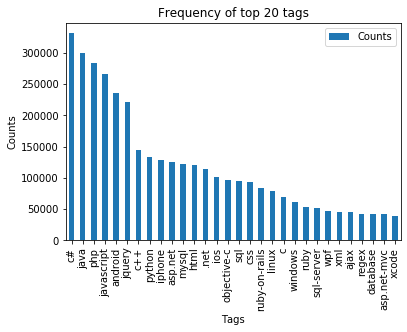

In [123]:
#top 30 questions
import numpy as np
i=np.arange(30)
plt.figure(figsize=(10,10))
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i,tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<Figure size 720x720 with 0 Axes>

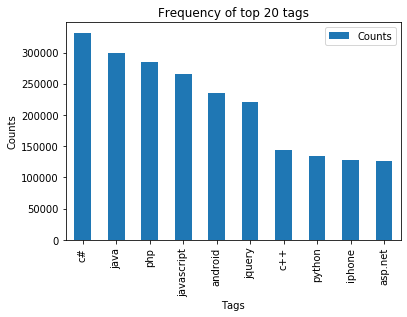

In [126]:
import numpy as np
i=np.arange(10)
plt.figure(figsize=(10,10))
tag_df_sorted.head(10).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i,tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

# preprocessing

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saireddyavs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [25]:
print(stop_words)

{'during', 'haven', 'doing', 'ours', 'while', 'both', 'd', "mustn't", 'was', 'very', 'too', 'shouldn', 'wasn', 'the', 'as', 'there', 'having', 'all', 'aren', 'y', 'being', "wouldn't", 'just', 'are', 'is', 'its', 'himself', 'why', 'other', 'further', 'her', 'here', 'itself', 'myself', 'same', 'did', "you've", 'it', 'how', 'theirs', 'm', 'some', 'most', 'now', 'been', 'few', 'he', 'his', 'or', 'has', 'that', 'yours', 'if', 'will', 'but', 'ain', 'can', "you'd", 'above', 't', 'only', 'which', 'after', 'hasn', "haven't", "should've", 'with', 'mightn', 'below', "you're", 'about', "couldn't", "hadn't", "mightn't", 'should', 'mustn', 'once', 'a', 'them', 'doesn', "shan't", 'what', 'when', 'hadn', "shouldn't", 'am', 'at', "needn't", "weren't", 'were', 'down', 'because', 'do', 'their', 'weren', 'our', 'own', 'needn', 'before', "didn't", 'yourself', 'this', 'ma', 've', 'hers', 'i', 'wouldn', 'against', 'll', 'each', 'than', 'again', 'isn', 'have', 'so', 'whom', "aren't", "doesn't", 'yourselves', 

In [30]:
df3.values[0][0]

'     Implementing Boundary Value Analysis of Software Testing in a C++ program?'

In [31]:
df3.values[0][1]

'<pre><code>#include&lt;iostream&gt;\n#include&lt;stdlib.h&gt;\n\nusing namespace std;\n\nint main()\n{\n         int n,a[n],x,c,u[n],m[n],e[n][4];\n         cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         for(int y=1; y&lt;n+1; y++)\n         {\n                 cin&gt;&gt;m[y];\n                 cin&gt;&gt;u[y];\n         }\n         for(x=1; x&lt;n+1; x++)\n         {\n                 a[x] = (m[x] + u[x])/2;\n         }\n         c=(n*4)-4;\n         for(int a1=1; a1&lt;n+1; a1++)\n         {\n\n             e[a1][0] = m[a1];\n             e[a1][1] = m[a1]+1;\n             e[a1][2] = u[a1]-1;\n             e[a1][3] = u[a1];\n         }\n         for(int i=1; i&lt;n+1; i++)\n         {\n            for(int l=1; l&lt;=i; l++)\n            {\n                 if(l!=1)\n                 {\n                    cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 }\n            }\n   

In [32]:
df3.values[0][2]

'c++ c'

In [48]:
row=df3.values[0]
title, question, tags = row[0], row[1], row[2]

In [49]:
import re
code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

In [50]:
code

'[\'#include&lt;iostream&gt;\\n#include&lt;stdlib.h&gt;\\n\\nusing namespace std;\\n\\nint main()\\n{\\n         int n,a[n],x,c,u[n],m[n],e[n][4];\\n         cout&lt;&lt;"Enter the number of variables";\\n         cin&gt;&gt;n;\\n\\n         cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\\n         for(int y=1; y&lt;n+1; y++)\\n         {\\n                 cin&gt;&gt;m[y];\\n                 cin&gt;&gt;u[y];\\n         }\\n         for(x=1; x&lt;n+1; x++)\\n         {\\n                 a[x] = (m[x] + u[x])/2;\\n         }\\n         c=(n*4)-4;\\n         for(int a1=1; a1&lt;n+1; a1++)\\n         {\\n\\n             e[a1][0] = m[a1];\\n             e[a1][1] = m[a1]+1;\\n             e[a1][2] = u[a1]-1;\\n             e[a1][3] = u[a1];\\n         }\\n         for(int i=1; i&lt;n+1; i++)\\n         {\\n            for(int l=1; l&lt;=i; l++)\\n            {\\n                 if(l!=1)\\n                 {\\n                    cout&lt;&lt;a[l]&lt;&lt;"\\\\t";\\n       

In [51]:
question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)

In [52]:
question

"<pre></pre>\n\n<p>The answer should come in the form of a table like</p>\n\n<pre></pre>\n\n<p>if the no of inputs is 3 and their ranges are\n1,100\n1,100\n1,100\n(could be varied too)</p>\n\n<p>The output is not coming,can anyone correct the code or tell me what's wrong?</p>\n"

In [53]:
question.encode('utf-8')

b"<pre></pre>\n\n<p>The answer should come in the form of a table like</p>\n\n<pre></pre>\n\n<p>if the no of inputs is 3 and their ranges are\n1,100\n1,100\n1,100\n(could be varied too)</p>\n\n<p>The output is not coming,can anyone correct the code or tell me what's wrong?</p>\n"

In [54]:
question=striphtml(question.encode('utf-8'))

In [55]:
question

'b"  \\n\\n The answer should come in the form of a table like \\n\\n  \\n\\n if the no of inputs is 3 and their ranges are\\n1,100\\n1,100\\n1,100\\n(could be varied too) \\n\\n The output is not coming,can anyone correct the code or tell me what\'s wrong? \\n"'

In [56]:
title=title.encode('utf-8')
title

b'     Implementing Boundary Value Analysis of Software Testing in a C++ program?'

In [57]:
question=str(title)+" "+str(question)
question

'b\'     Implementing Boundary Value Analysis of Software Testing in a C++ program?\' b"  \\n\\n The answer should come in the form of a table like \\n\\n  \\n\\n if the no of inputs is 3 and their ranges are\\n1,100\\n1,100\\n1,100\\n(could be varied too) \\n\\n The output is not coming,can anyone correct the code or tell me what\'s wrong? \\n"'

In [60]:
question=question.replace('\\n', '')
question

'b\'     Implementing Boundary Value Analysis of Software Testing in a C++ program?\' b"   The answer should come in the form of a table like    if the no of inputs is 3 and their ranges are1,1001,1001,100(could be varied too)  The output is not coming,can anyone correct the code or tell me what\'s wrong? "'

In [62]:
question=re.sub(r'[^A-Za-z]+',' ',question)
question

'b Implementing Boundary Value Analysis of Software Testing in a C program b The answer should come in the form of a table like if the no of inputs is and their ranges are could be varied too The output is not coming can anyone correct the code or tell me what s wrong '

In [63]:
#nltk.download('punkt')
words=word_tokenize(str(question.lower()))
print(words)

['b', 'implementing', 'boundary', 'value', 'analysis', 'of', 'software', 'testing', 'in', 'a', 'c', 'program', 'b', 'the', 'answer', 'should', 'come', 'in', 'the', 'form', 'of', 'a', 'table', 'like', 'if', 'the', 'no', 'of', 'inputs', 'is', 'and', 'their', 'ranges', 'are', 'could', 'be', 'varied', 'too', 'the', 'output', 'is', 'not', 'coming', 'can', 'anyone', 'correct', 'the', 'code', 'or', 'tell', 'me', 'what', 's', 'wrong']


In [64]:
question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
question

'implement boundari valu analysi softwar test c program answer come form tabl like input rang could vari output come anyon correct code tell wrong'

In [67]:
x = len(question)+len(title)
tup = (question,code,tags,x,len(question))
tup

('implement boundari valu analysi softwar test c program answer come form tabl like input rang could vari output come anyon correct code tell wrong',
 '[\'#include&lt;iostream&gt;\\n#include&lt;stdlib.h&gt;\\n\\nusing namespace std;\\n\\nint main()\\n{\\n         int n,a[n],x,c,u[n],m[n],e[n][4];\\n         cout&lt;&lt;"Enter the number of variables";\\n         cin&gt;&gt;n;\\n\\n         cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\\n         for(int y=1; y&lt;n+1; y++)\\n         {\\n                 cin&gt;&gt;m[y];\\n                 cin&gt;&gt;u[y];\\n         }\\n         for(x=1; x&lt;n+1; x++)\\n         {\\n                 a[x] = (m[x] + u[x])/2;\\n         }\\n         c=(n*4)-4;\\n         for(int a1=1; a1&lt;n+1; a1++)\\n         {\\n\\n             e[a1][0] = m[a1];\\n             e[a1][1] = m[a1]+1;\\n             e[a1][2] = u[a1]-1;\\n             e[a1][3] = u[a1];\\n         }\\n         for(int i=1; i&lt;n+1; i++)\\n         {\\n            for(i

In [70]:
df3.shape[0]

4206307

In [72]:
import datetime as dt
start = dt.datetime.now()
preprocessed_data_list=[]

questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
ques=[]
tags_processed=[]
for row in df3.values:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    
    ques.append(question)
    tags_processed.append(tags)
    questions_proccesed += 1
    
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", dt.datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
number of questions completed= 600000
number of questions completed= 700000
number of questions completed= 800000
number of questions completed= 900000
number of questions completed= 1000000
number of questions completed= 1100000
number of questions completed= 1200000
number of questions completed= 1300000
number of questions completed= 1400000
number of questions completed= 1500000
number of questions completed= 1600000
number of questions completed= 1700000
number of questions completed= 1800000
number of questions completed= 1900000
number of questions completed= 2000000
number of questions completed= 2100000
number of questions completed= 2200000
number of questions completed= 2300000
number of questions completed= 2400000
number of questions completed= 2500000
number of questions completed= 260

In [74]:
len(ques),len(tags_processed),df3.shape[0]

(4206307, 4206307, 4206307)

In [75]:
d={'Question':ques,'Tags':tags_processed}

In [77]:
cleand=pd.DataFrame(d)

In [78]:
cleand.head()

,Question,Tags
0,implement boundari valu analysi softwar test c...,c++ c
1,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding
2,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding columns
3,java lang noclassdeffounderror javax servlet j...,jsp jstl
4,java sql sqlexcept microsoft odbc driver manag...,java jdbc


In [79]:
cleand.to_csv("cleand.csv")